In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sciplotlib.style as splstyle
import matplotlib.patches as patches

import scipy.stats as sstats
import os 

# Spike Detection

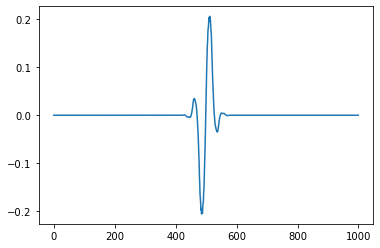

In [36]:
import scipy.io as sio
c = sio.loadmat('/Users/timothysit/mecp2/python/notebooks/bior1.5waveletC.mat')['c']

fig, ax = plt.subplots()
ax.plot(c[40, :])

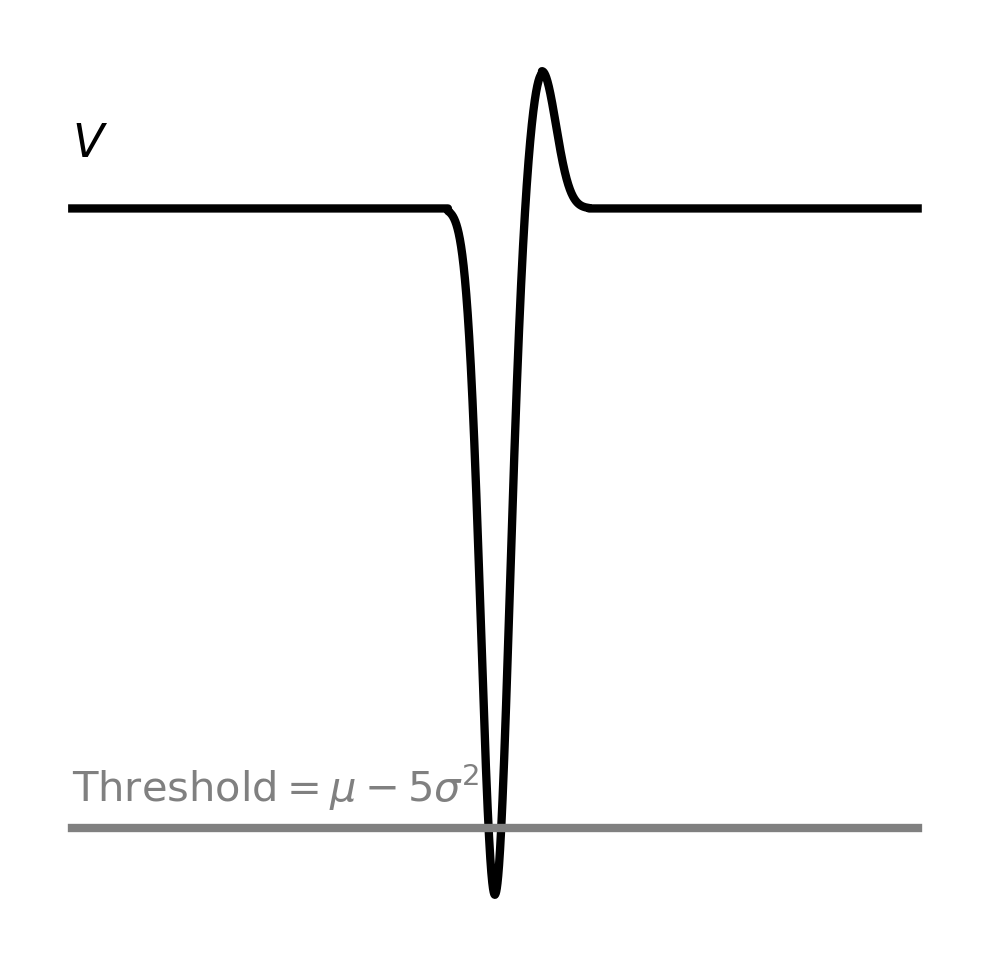

In [158]:
fig_folder = '/Users/timothysit/AnalysisPipeline/python/feature-schematic-figures'
fig_name = 'threshold_spike_detection.svg'


x_axis = np.linspace(-10, 10, 1000)
gaussian_vector = sstats.norm.pdf(x_axis,0,3)
rebound_gaussian_vector = sstats.norm.pdf(x_axis,0,3)

voltage_time_course = np.zeros((10000, ))
spike_start_frame = 5000

voltage_time_course[5000:5000+len(gaussian_vector)] += -gaussian_vector
voltage_time_course[5500:5500+len(rebound_gaussian_vector)] += rebound_gaussian_vector * 0.2

with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    ax.plot(voltage_time_course[1000:], color='black')
    ax.plot([0, 9000], [-0.12, -0.12], color='gray')
    ax.text(0, 0.01, r'$V$', size=11)
    ax.text(0, -0.115, r'$\mathrm{Threshold} = \mu - 5 \sigma^2$', color='gray')
    
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight', transparent=True)

# Template based spike detection

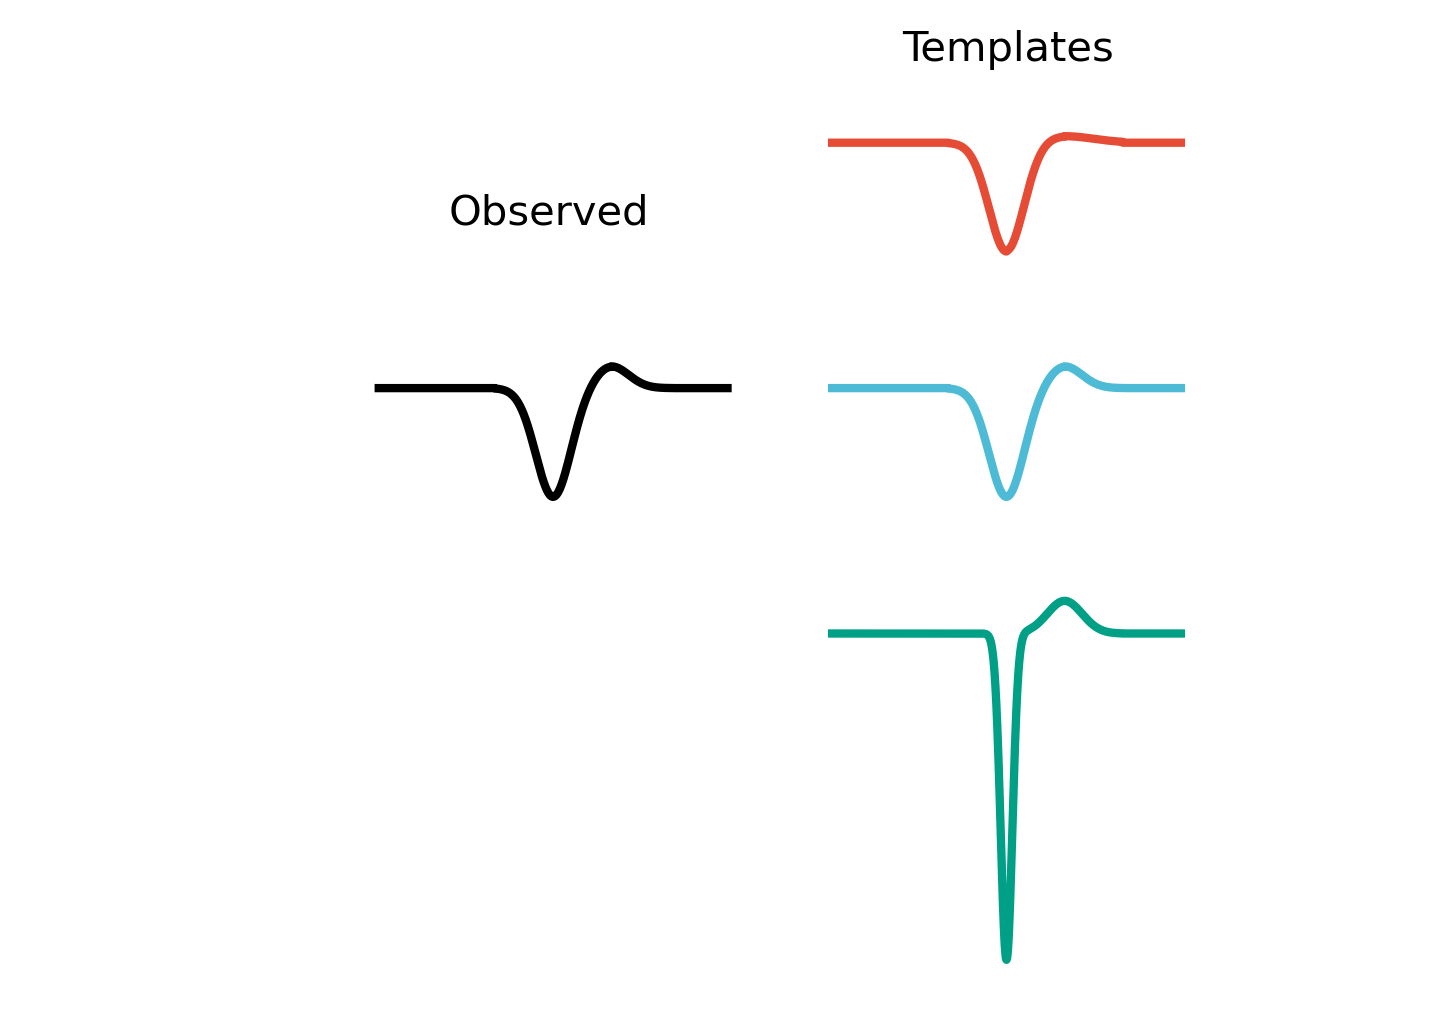

In [234]:
fig_folder = '/Users/timothysit/AnalysisPipeline/python/feature-schematic-figures'
fig_name = 'template_spike_detection.svg'


def make_spike_waveform(spike_std=3, rebound_std=3, 
                        rebound_amplitude=0.2,
                       voltage_num_samples=10000,
                       spike_length=1000):
    
    x_axis = np.linspace(-10, 10, spike_length)
    gaussian_vector = sstats.norm.pdf(x_axis,0,spike_std)
    rebound_gaussian_vector = sstats.norm.pdf(x_axis,0,rebound_std)

    voltage_time_course = np.zeros((voltage_num_samples, ))
    spike_start_frame = int(voltage_num_samples/2) - int(spike_length/2)
    rebound_start_frame = spike_start_frame + 500

    voltage_time_course[spike_start_frame:spike_start_frame+len(gaussian_vector)] += -gaussian_vector
    voltage_time_course[rebound_start_frame:rebound_start_frame+len(rebound_gaussian_vector)] += rebound_gaussian_vector * rebound_amplitude

    
    return voltage_time_course

with plt.style.context(splstyle.get_style('nature-reviews')):
    
    voltage_num_samples = 3000
    template_spike_std = [3, 3, 1]
    template_rebound_std = [5, 3, 3]
    template_rebound_amplitude = [0.1, 0.2, 0.3]
    offsets = [0.3, 0, -0.3]
    
    fig, ax = plt.subplots()
    
    original_x = np.linspace(0, 1, voltage_num_samples)
    original_spike = make_spike_waveform(spike_std=3, rebound_std=3, rebound_amplitude=0.2,
                                        voltage_num_samples=voltage_num_samples)
    ax.plot(original_x, original_spike, color='black')
    
    for template_idx in np.arange(len(template_spike_std)):
        
        template_x = np.linspace(1, 2, voltage_num_samples)
        template_spike = make_spike_waveform(spike_std=template_spike_std[template_idx], 
                                             rebound_std=template_rebound_std[template_idx], 
                                             rebound_amplitude=template_rebound_amplitude[template_idx],
                                            voltage_num_samples=voltage_num_samples)
        
        ax.plot(template_x + 0.3, template_spike + offsets[template_idx])
        
    ax.set_xlim([-1, 3])
    
    ax.text(0.2, 0.2, 'Observed', color='black')
    ax.text(1.5, 0.4, 'Templates', color='black')
    
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight', transparent=True)

# Burst detection

In [160]:
def plot_burst_trace(time_range=[0.5, 9], spike_times=[1, 2, 4.1, 4.3, 4.6, 4.8, 4.9, 5.1, 5.3, 7, 8.3], 
                     spike_height=0.75, burst_shaded_time_range = [4.1, 5.3], burst_box_offset=0.1,
                     fig=None, ax=None):
    
    
    flat_line_color = 'black'
    spikes_color = 'black'
    solid_capstyle = 'round'  # rounded lines
    
    
    
    if (fig is None) and (ax is None):
        fig, ax = plt.subplots()
        fig.set_size_inches(5, 3)
    
    # Flat line 
    ax.plot([time_range[0], time_range[1]], [spike_height/2, spike_height/2], color=flat_line_color, solid_capstyle=solid_capstyle)
    
    # Spikes
    
    for spk in spike_times:

        ax.plot([spk, spk], [0, spike_height], color=spikes_color, solid_capstyle=solid_capstyle)
    
    rect = patches.FancyBboxPatch((burst_shaded_time_range[0], spike_height + burst_box_offset), 
                             burst_shaded_time_range[1] - burst_shaded_time_range[0], 0.25, 
                             linewidth=1, edgecolor='None', facecolor='orange',
                                mutation_scale=0.5, mutation_aspect=0.1)

    
    ax.add_patch(rect)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    return fig, ax

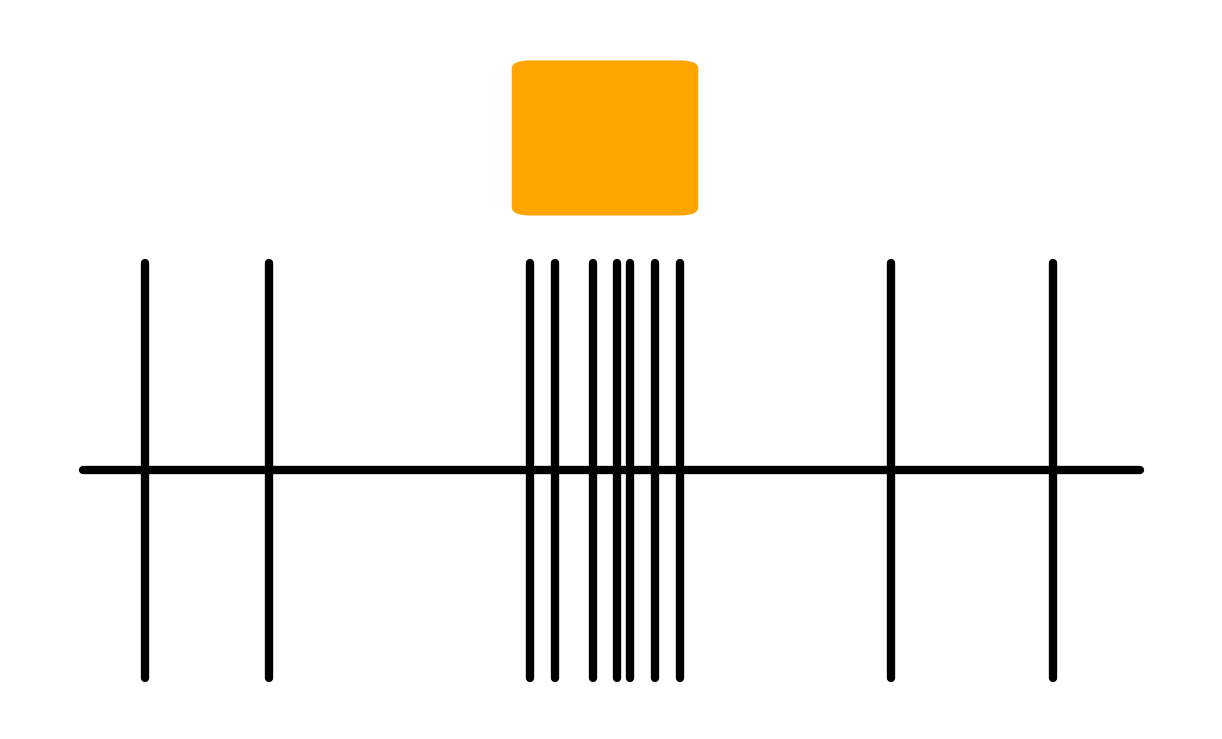

In [161]:
fig_name = 'burst_detection.svg'

flat_line_color = 'black'
spikes_color = 'black'
solid_capstyle = 'round'  # rounded lines
time_range = [0.5, 9]
burst_shaded_time_range = [4.1, 5.3]
spike_times = [1, 2, 4.1, 4.3, 4.6, 4.8, 4.9, 5.1, 5.3, 7, 8.3]
spike_height = 0.75

with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 3)
    ax.plot([time_range[0], time_range[1]], [spike_height/2, spike_height/2], color=flat_line_color, solid_capstyle=solid_capstyle)

    for spk in spike_times:

        ax.plot([spk, spk], [0, spike_height], color=spikes_color, solid_capstyle=solid_capstyle)
    
    rect = patches.FancyBboxPatch((burst_shaded_time_range[0], spike_height + 0.1), 
                             burst_shaded_time_range[1] - burst_shaded_time_range[0], 0.25, 
                             linewidth=1, edgecolor='None', facecolor='orange',
                                mutation_scale=0.5, mutation_aspect=0.1)

    
    ax.add_patch(rect)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Network burst

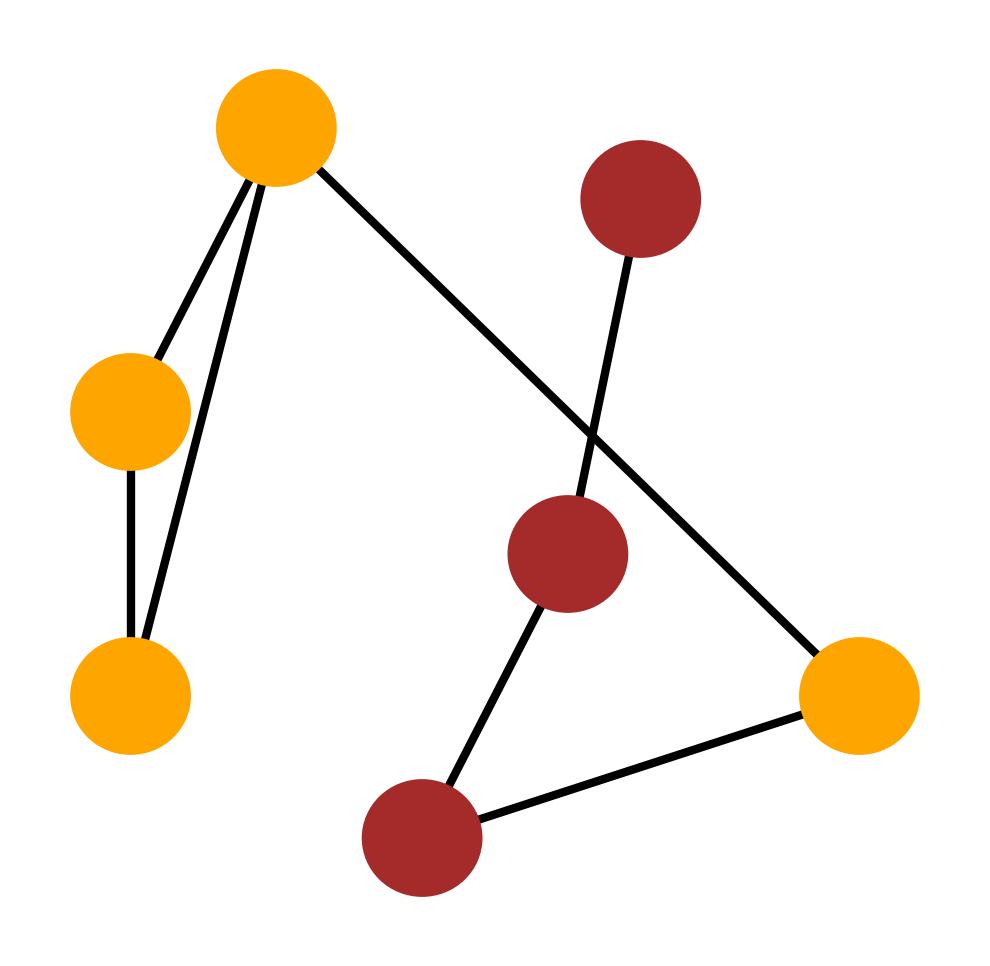

In [58]:
fig_name = 'network_burst.svg'
fig_folder = '/Users/timothysit/AnalysisPipeline/python/feature-schematic-figures'

node_locations = [
    [0.3, 0.3], 
    [0.3, 0.5], 
    [0.4, 0.7], 
    [0.8, 0.3], 
    [0.5, 0.2], 
    [0.6, 0.4], 
    [0.65, 0.65]
]



node_groups = [
    0, 0, 0, 0, 1, 1, 1
]

node_radius = 0.04

num_nodes = len(node_locations)
adjacency_matrix = np.zeros((
    num_nodes, num_nodes
))

adjacency_matrix[0, 1] = 1 
adjacency_matrix[1, 2] = 1 
adjacency_matrix[2, 3] = 1 
adjacency_matrix[0, 2] = 1 

adjacency_matrix[3, 4] = 1 
adjacency_matrix[4, 5] = 1 
adjacency_matrix[5, 6] = 1 
            
with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)

    for node_idx, node_loc in enumerate(node_locations):
        
        if node_groups[node_idx] == 0:
            color = 'orange'
        else:
            color = 'brown'

        circ = patches.Circle((node_loc[0], node_loc[1]), node_radius, color=color)
        ax.add_patch(circ)

    for adj_i in np.arange(num_nodes):
        for adj_j in np.arange(num_nodes):
            if adjacency_matrix[adj_i, adj_j] == 1:

                # draw connection 
                # print('Plotting edge from (%.2f %.2f) to (%.2f %.2f)' % (node_locations[adj_i][0], node_locations[adj_i][1],
                #                                              node_locations[adj_j][0], node_locations[adj_j][1])
                #       )
                ax.plot([node_locations[adj_i][0], node_locations[adj_j][0]],
                        [node_locations[adj_i][1], node_locations[adj_j][1]], color='black', zorder=-1)
                
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight')

In [71]:
[node_locations[adj_i][0], node_locations[adj_j][0]]

[0.65, 0.65]

In [73]:
[node_locations[adj_i][1], node_locations[adj_j][1]]

[0.65, 0.65]

# ISI within network burst

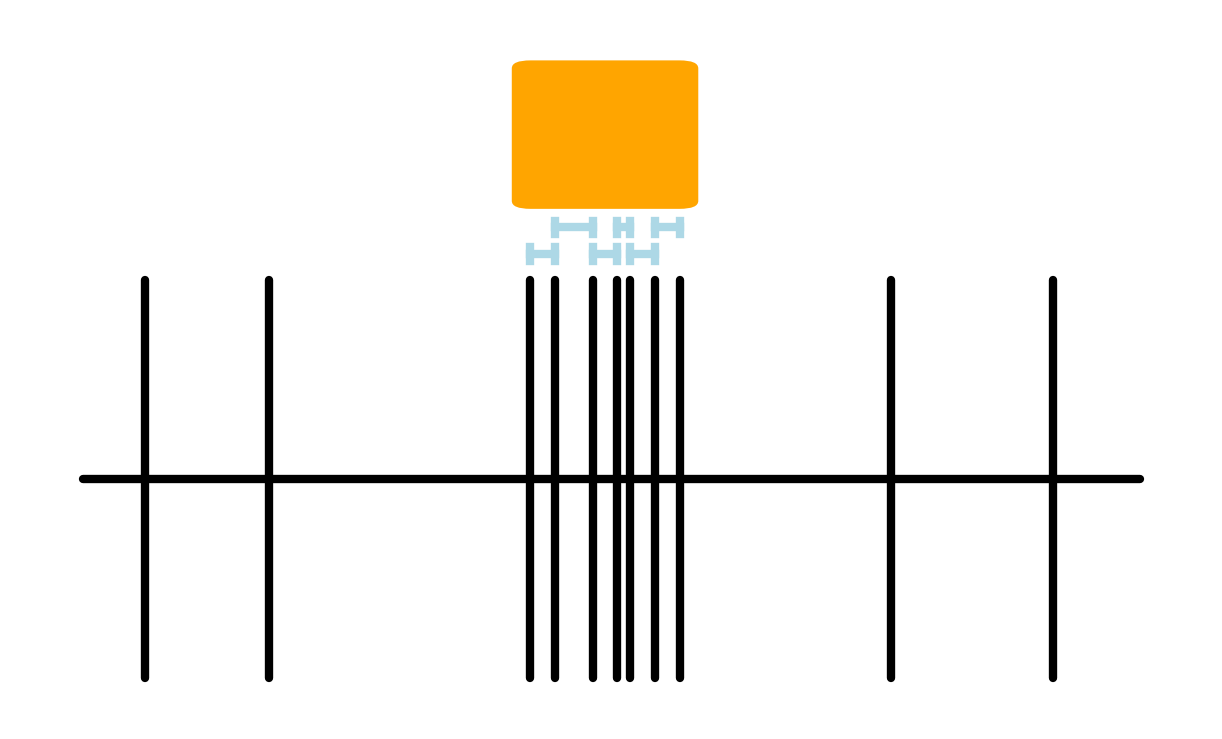

In [162]:
fig_folder = '/Users/timothysit/AnalysisPipeline/python/feature-schematic-figures'
fig_name = 'isi_within_network_burst.svg'


spike_times = np.array([1, 2, 4.1, 4.3, 4.6, 4.8, 4.9, 5.1, 5.3, 7, 8.3])
within_burst = [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
spike_height = 0.75

isi_heights = [0.8, 0.85]
isi_vert_height = 0.025

with plt.style.context(splstyle.get_style('nature-reviews')):

    
    fig, ax = plot_burst_trace(time_range=[0.5, 9], spike_times=spike_times, spike_height=spike_height,
                               burst_box_offset=0.15, fig=None, ax=None)
    
    n_isi = 0
    
    for spike_idx in np.arange(len(spike_times) - 1):
        
        if (within_burst[spike_idx] == 1) & (within_burst[spike_idx+1] == 1):
            
            if n_isi % 2 == 0:
                isi_height = isi_heights[0]
            else:
                isi_height = isi_heights[1]
            
            ax.plot([spike_times[int(spike_idx)], spike_times[int(spike_idx+1)]],
                     [isi_height, isi_height], color='lightblue')
            ax.plot([spike_times[int(spike_idx)], spike_times[int(spike_idx)]],
                     [isi_height-isi_vert_height/2, isi_height+isi_vert_height/2], color='lightblue')
            ax.plot([spike_times[int(spike_idx+1)], spike_times[int(spike_idx+1)]],
                     [isi_height-isi_vert_height/2, isi_height+isi_vert_height/2], color='lightblue')
            
            
            n_isi += 1
    
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight', transparent=True)

# STTC

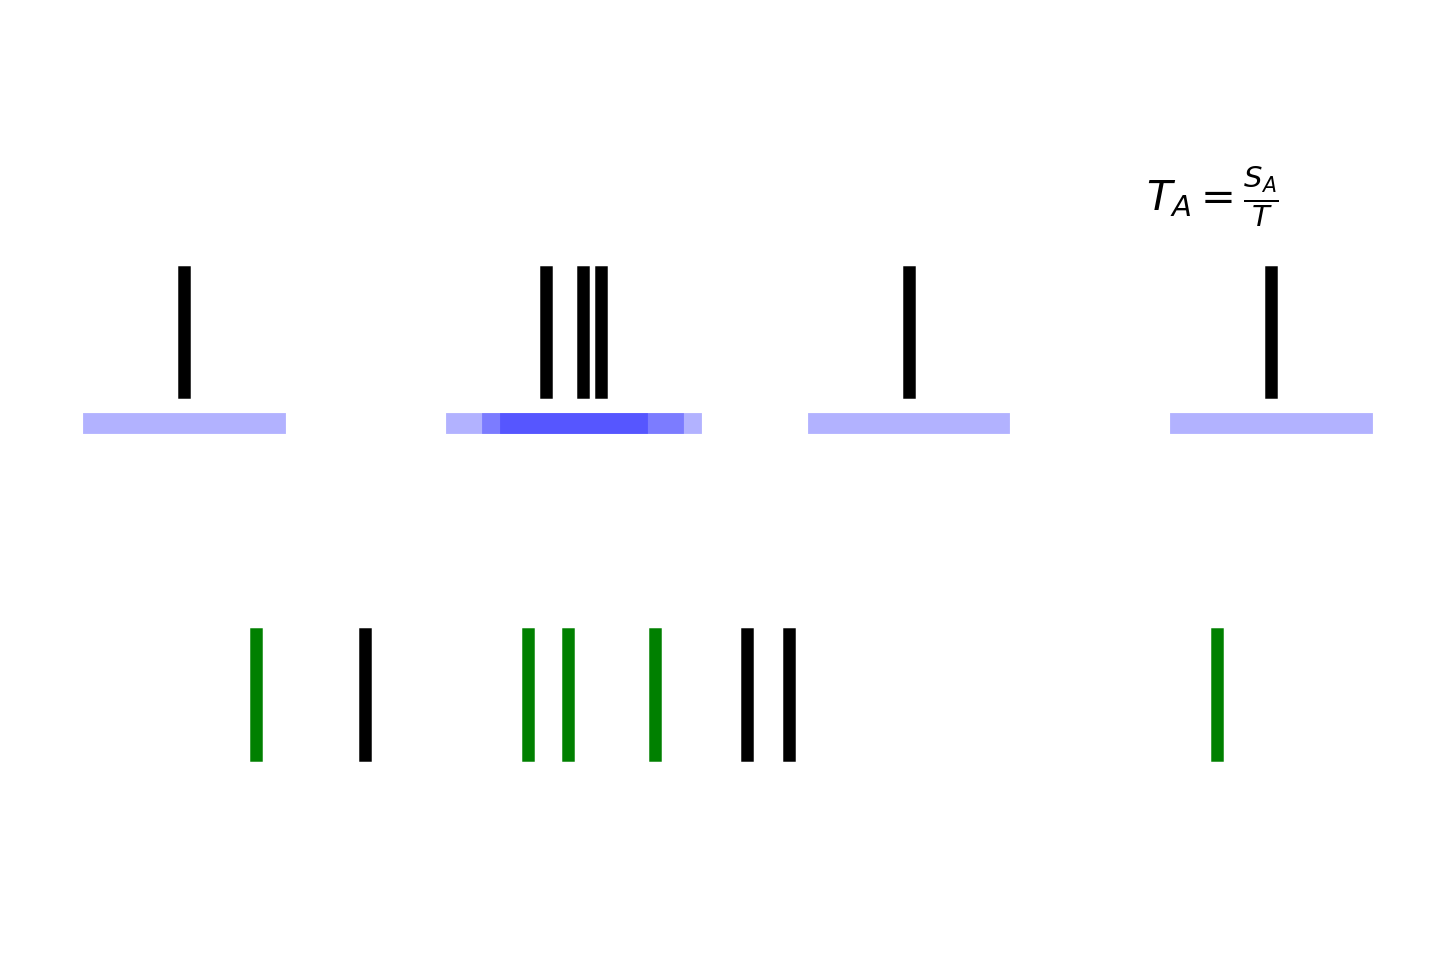

In [163]:
fig_folder = '/Users/timothysit/AnalysisPipeline/python/feature-schematic-figures'
fig_name = 'sttc.svg'



import matplotlib as mpl


time_range = [0, 10]
y_range = [0, 1.5]

spike_train_A_y = 1
spike_train_B_y = 0.4
spike_lw = 3

spike_train_A_times = [1, 3, 3.2, 3.3, 5, 7]

spike_train_B_times = [1.4, 2, 2.9, 3.12, 3.6, 4.11, 4.34, 6.7]
within_tile = [1, 0, 1, 1, 1, 0, 0, 1]

spike_vert_height = 0.2
tile_y_offset = 0.05

time_lag = 0.5

with plt.style.context(splstyle.get_style('nature-reviews')): 
    
    # plt.rc('text', usetex=True)
    # plt.rcParams['text.latex.preamble'].join([r"\usepackage{xcolor}"])
    # plt.rc('text.latex', preamble=r'\usepackage{xcolor}')
    # pgf_with_latex = {
    #     "text.usetex": True,  
    #      "pgf.preamble": "\n".join([ # plots will use this preamble
    #     r"\usepackage[utf8]{inputenc}",
    #     r"\usepackage[T1]{fontenc}",
    #     r"\usepackage[detect-all,locale=DE]{siunitx}",
    #     r"\usepackage{xcolor}",
    #     ])
    # }
    # mpl.rcParams.update(pgf_with_latex)

           
    fig, ax = plt.subplots()
    
    for spike_t in spike_train_A_times:
        
        ax.plot([spike_t, spike_t], [spike_train_A_y - spike_vert_height/2, 
                                    spike_train_A_y + spike_vert_height/2], 
                color='black', lw=spike_lw)
        
        ax.plot([spike_t - time_lag, 
                spike_t + time_lag], 
                [spike_train_A_y - spike_vert_height/2 - tile_y_offset,
                 spike_train_A_y - spike_vert_height/2 - tile_y_offset], 
               color='blue', alpha=0.3, lw=5)
        
    
    for s_i, spike_t in enumerate(spike_train_B_times):
        
        if within_tile[s_i]:
            color = 'green'
        else:
            color = 'black'
        
        ax.plot([spike_t, spike_t], [spike_train_B_y - spike_vert_height/2, 
                                    spike_train_B_y + spike_vert_height/2], color=color, lw=spike_lw)
        
    
    ax.set_ylim(y_range)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.text(0.8, 0.8, r'$T_A = \frac{S_A}{T}$', transform=ax.transAxes)
    
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight', transparent=True)

# Probabilistic thresholding

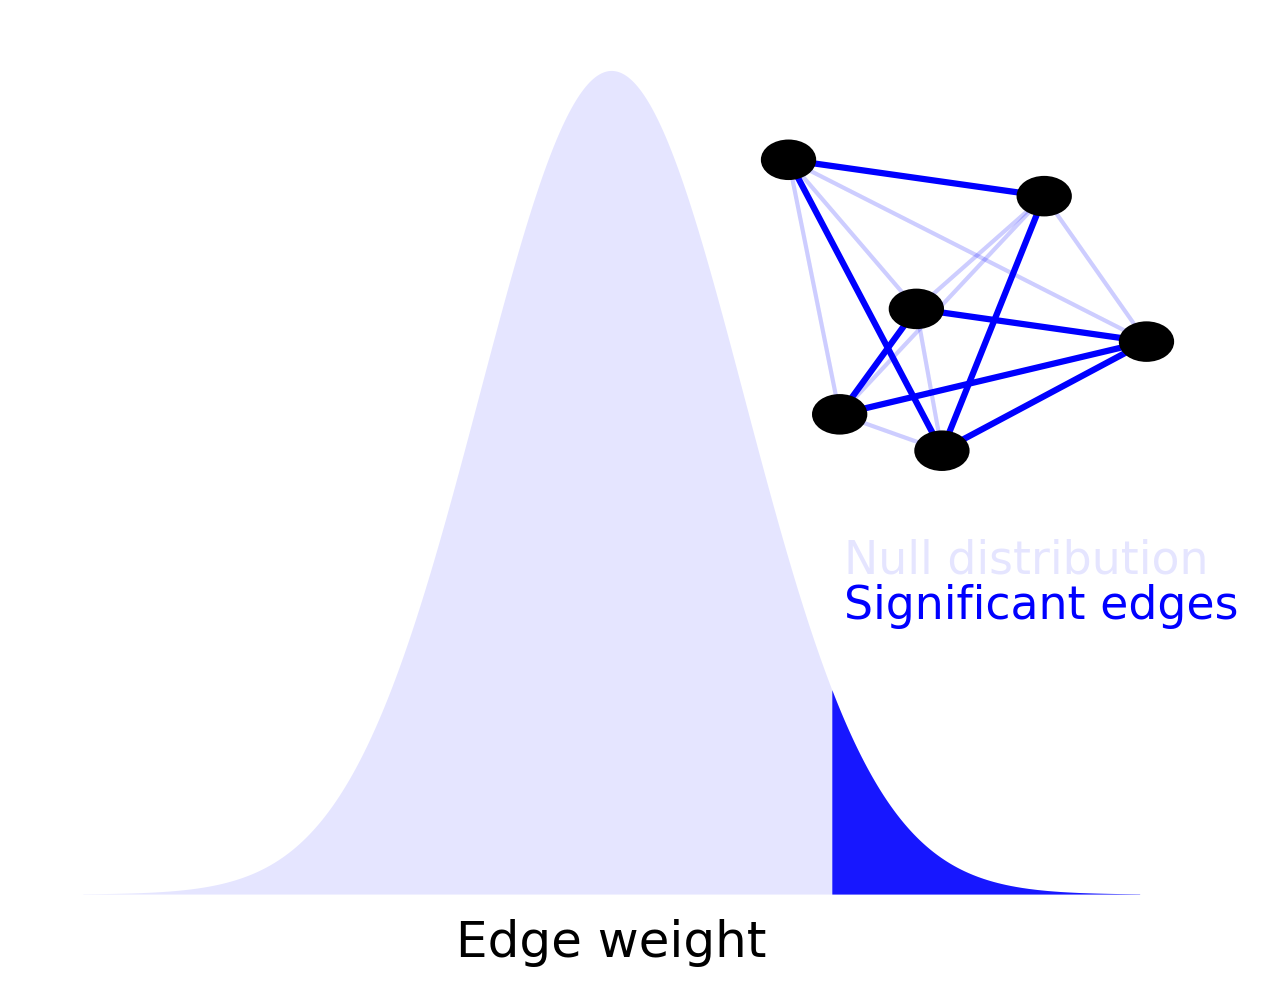

In [164]:
fig_folder = '/Users/timothysit/AnalysisPipeline/python/feature-schematic-figures'
fig_name = 'probabilistic_thresholding.svg'

with plt.style.context(splstyle.get_style('nature-reviews')):
    
    frac_curve_to_fill = 0.7
    curve_num_points = 1000
    # sig_start_idx = int(curve_num_points * frac_curve_to_fill)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 4)
    x_axis = np.linspace(-12, 12, curve_num_points)
    sig_start_idx = np.where(x_axis >= 5)[0][0]
    gaussian_vector = sstats.norm.pdf(x_axis,0,3)
    # ax.plot(x_axis, gaussian_vector)
    ax.fill_between(x_axis, gaussian_vector, color='blue', alpha=0.1, lw=0)
    
    ax.fill_between(x_axis[sig_start_idx:], gaussian_vector[sig_start_idx:], color='blue', alpha=0.9, lw=0)
    ax.text(0, -0.01, 'Edge weight', ha='center', size=12)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    net_ax = fig.add_axes([0.6, 0.5, 0.3, 0.3])
    
    node_locations = np.array([
        [0.2, 0.2],
        [0.35, 0.49], 
        [0.8, 0.4],
        [0.4, 0.1],
        [0.6, 0.8],
        [0.1, 0.9]
    ])
    
    num_nodes = len(node_locations)
    adjacency_matrix = np.zeros((
        num_nodes, num_nodes
    ))

    adjacency_matrix[0, 1] = 1 
    adjacency_matrix[0, 2] = 1 
    adjacency_matrix[1, 2] = 1 
    # adjacency_matrix[1, 3] = 1
    adjacency_matrix[2, 3] = 1 
    adjacency_matrix[3, 4] = 1 
    adjacency_matrix[4, 5] = 1 
    adjacency_matrix[3, 5] = 1 
    
    
    
    node_color = 'black'
    node_radius = 0.05
    
    for node_idx, node_loc in enumerate(node_locations):

        circ = patches.Circle((node_loc[0], node_loc[1]), node_radius, color=node_color)
        net_ax.add_patch(circ)
    
    for adj_i in np.arange(num_nodes):
        for adj_j in np.arange(num_nodes):
            if adjacency_matrix[adj_i, adj_j] == 1:

                # draw connection 
                # print('Plotting edge from (%.2f %.2f) to (%.2f %.2f)' % (node_locations[adj_i][0], node_locations[adj_i][1],
                #                                              node_locations[adj_j][0], node_locations[adj_j][1])
                #       )
                net_ax.plot([node_locations[adj_i][0], node_locations[adj_j][0]],
                        [node_locations[adj_i][1], node_locations[adj_j][1]], color='blue', zorder=-1, lw=1.5, alpha=1)
            else:
                net_ax.plot([node_locations[adj_i][0], node_locations[adj_j][0]],
                        [node_locations[adj_i][1], node_locations[adj_j][1]], color='blue', zorder=-1, lw=1, alpha=0.1)
    
    
    ax.text(0.7, 0.4, 'Null distribution', size=11, transform=ax.transAxes, color='blue', alpha=0.1)
    ax.text(0.7, 0.35, 'Significant edges', size=11, transform=ax.transAxes, color='blue', alpha=1)
    
    net_ax.set_xticks([])
    net_ax.set_yticks([])
    net_ax.spines['bottom'].set_visible(False)
    net_ax.spines['left'].set_visible(False)
    net_ax.set_facecolor('None')
    
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight', transparent=True)

# Node cartography schematic

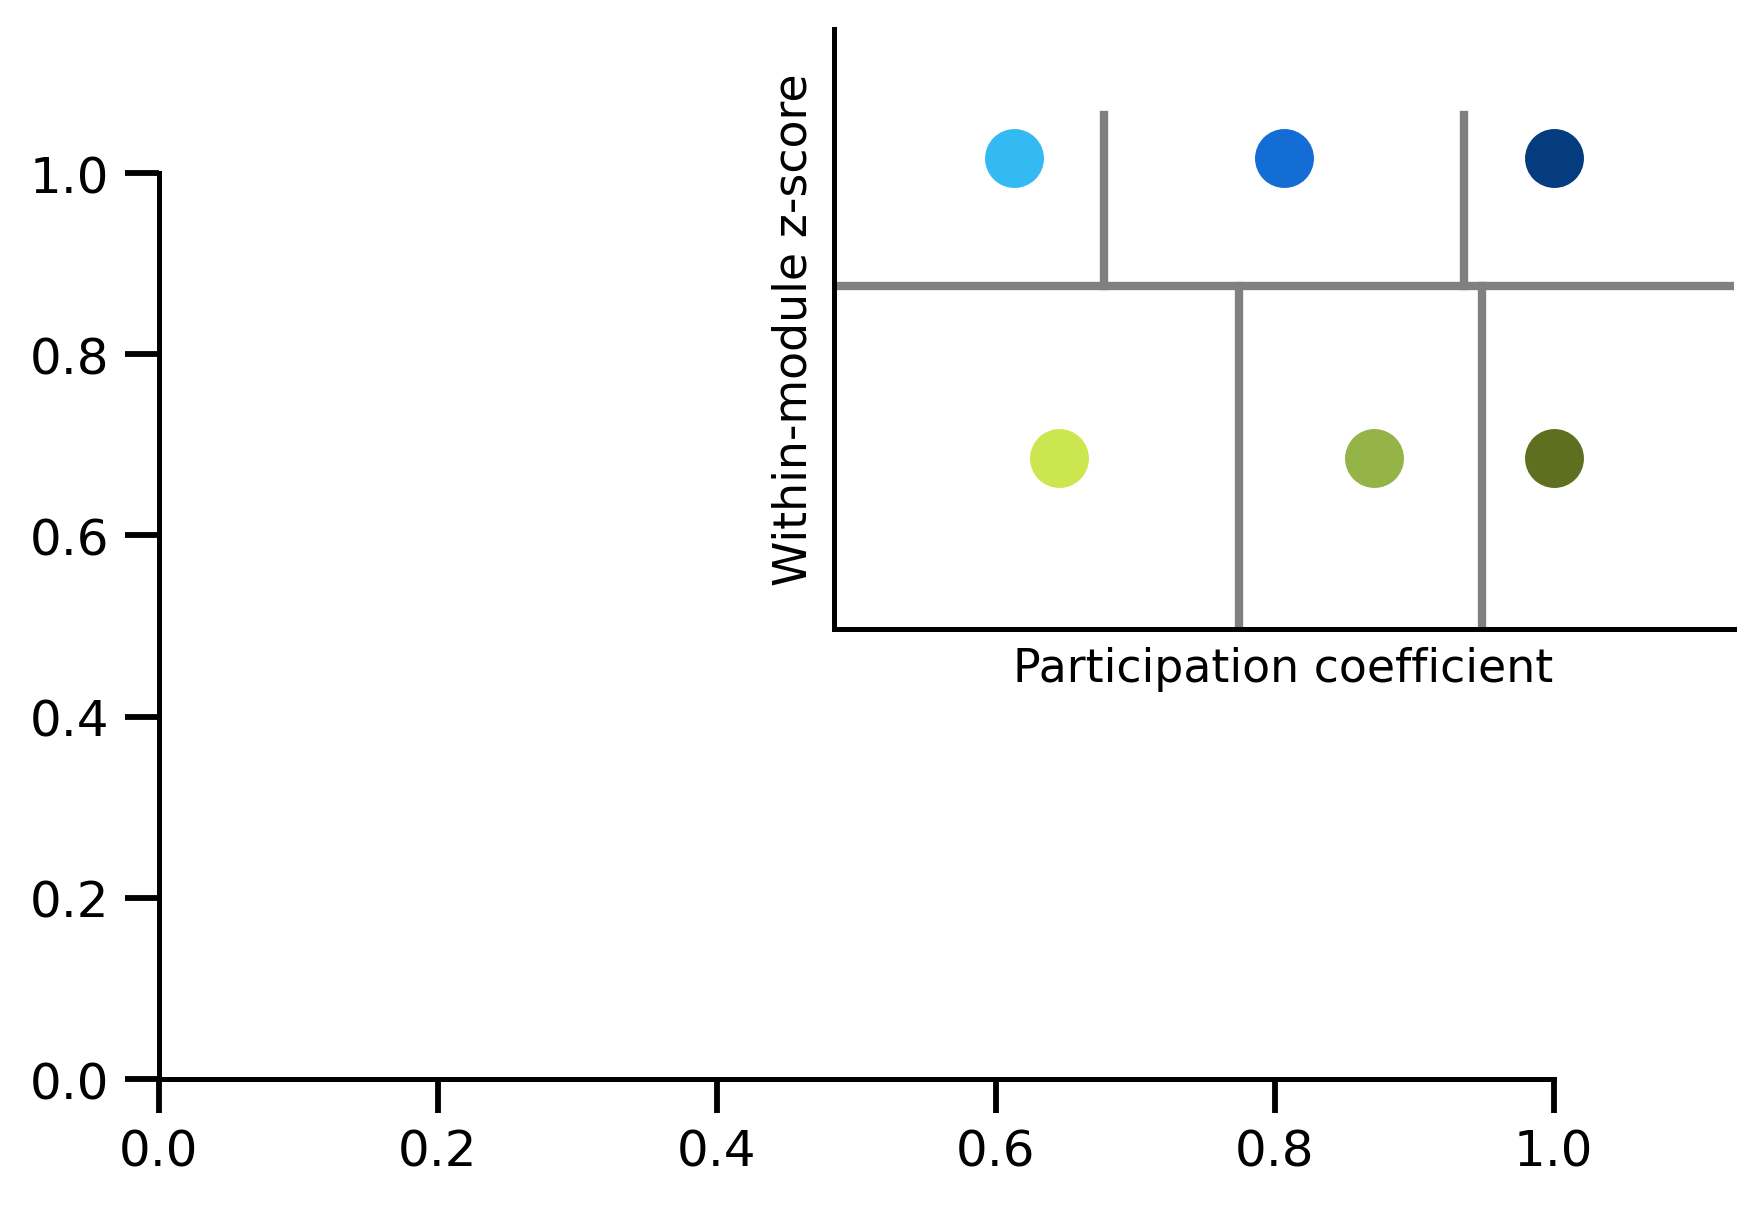

In [53]:
with plt.style.context(splstyle.get_style('nature-reviews')):
    
    fig, ax = plt.subplots()
    
    hub_colors = np.array([
        [0.8, 0.902, 0.310],
        [0.58, 0.706, 0.278], 
        [0.369, 0.435, 0.122], 
        [0.2, 0.729, 0.949],
        [0.078, 0.424, 0.835],
        [0.016, 0.235, 0.498],
    ])
    
    hub_locations = np.array([
        [0.25, 1], 
        [0.6, 1], 
        [0.8, 1],
        [0.2, 2.75], 
        [0.5, 2.75], 
        [0.8, 2.75],
    ])
    
    metric_axes = fig.add_axes([0.5, 0.5, 0.5, 0.5])
    
    metric_axes.set_xlabel('Participation coefficient', size=11)
    metric_axes.set_ylabel('Within-module z-score', size=11)
    
    for num_hub_type in np.arange(np.shape(hub_locations)[0]):
        
        metric_axes.scatter(hub_locations[num_hub_type, 0], hub_locations[num_hub_type, 1], lw=0, 
                           color=hub_colors[num_hub_type], s=200)
    
    boundary_linestyle = '-'
    metric_axes.plot([0.3, 0.3], [2, 3], color='gray', linestyle=boundary_linestyle)
    metric_axes.plot([0.7, 0.7], [2, 3], color='gray', linestyle=boundary_linestyle)
    metric_axes.plot([0.45, 0.45], [0, 2], color='gray', linestyle=boundary_linestyle)
    metric_axes.plot([0.72, 0.72], [0, 2], color='gray', linestyle=boundary_linestyle)
    metric_axes.axhline(2, color='gray', linestyle=boundary_linestyle)
    
    
    metric_axes.set_xticks([])
    metric_axes.set_yticks([])
    metric_axes.set_xlim([0, 1])
    metric_axes.set_ylim([0, 3.5])

# Classification cartoon

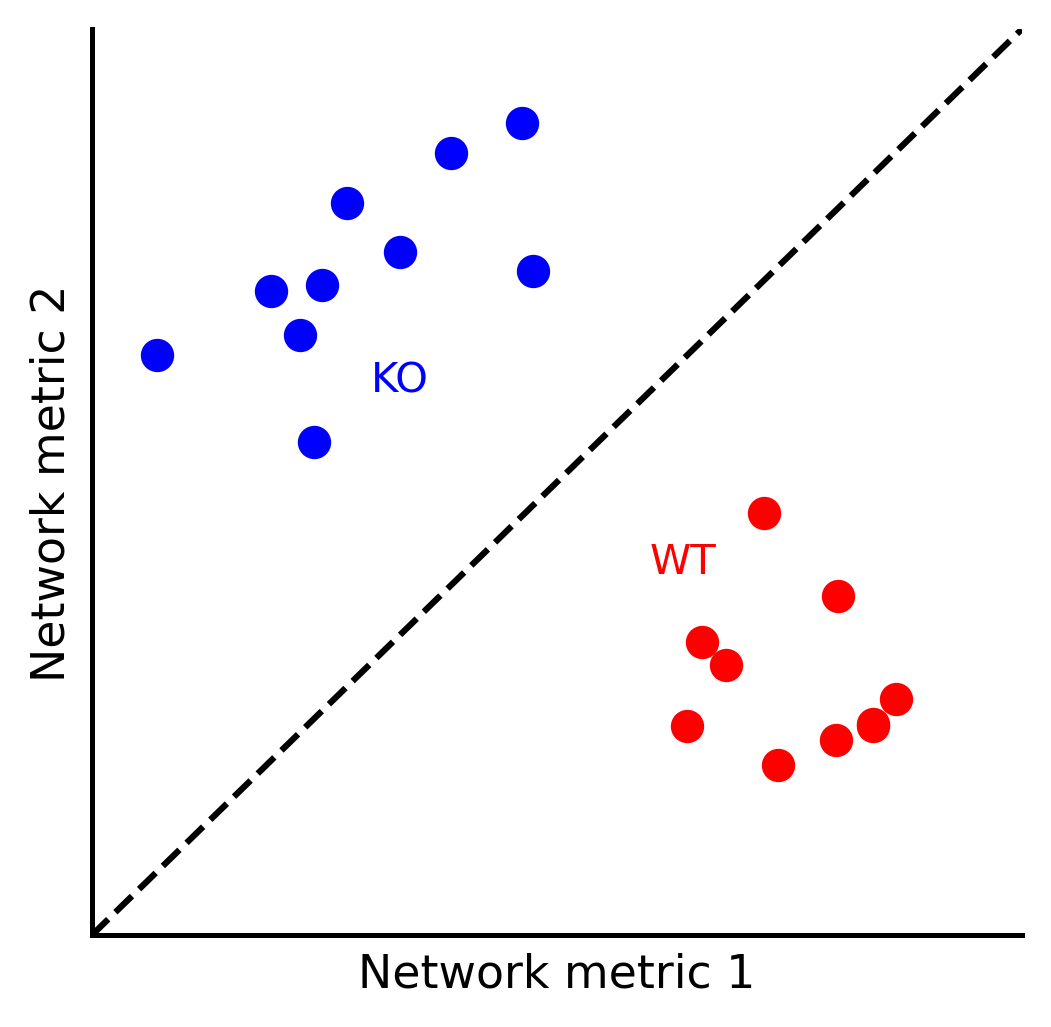

In [191]:
fig_folder = '/Users/timothysit/AnalysisPipeline/python/feature-schematic-figures'
fig_name = 'classification.svg'

with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    
    group_colors = ['blue', 'red']
    group_1_num_points = 10
    group_1_mean = [0.3, 0.75]
    group_1_var = [0.1, 0.1]
    
    group_2_num_points = 10
    group_2_mean = [0.75, 0.3]
    group_2_var = [0.1, 0.1]
    
    np.random.seed(1)
    group_1_x_locs = np.random.normal(group_1_mean[0], group_1_var[0], group_1_num_points)
    group_1_y_locs = np.random.normal(group_1_mean[1], group_1_var[1], group_1_num_points)
    
    ax.scatter(group_1_x_locs, group_1_y_locs, color=group_colors[0])
    
    group_2_x_locs = np.random.normal(group_2_mean[0], group_2_var[0], group_2_num_points)
    group_2_y_locs = np.random.normal(group_2_mean[1], group_2_var[1], group_2_num_points)
    
    ax.scatter(group_2_x_locs, group_2_y_locs, color=group_colors[1])
    
    classifier_line_x = np.linspace(0, 1, 100)
    classifier_line_y = np.linspace(0, 1, 100)
    ax.plot(classifier_line_x, classifier_line_y, linestyle='--', color='black', lw=1.5)
    
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
    ax.set_xlabel('Network metric 1', size=11)
    ax.set_ylabel('Network metric 2', size=11)
    
    ax.text(0.3, 0.6, 'KO', color='blue')
    ax.text(0.6, 0.4, 'WT', color='red')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight', transparent=True)

# Comparison across DIV and genotypes

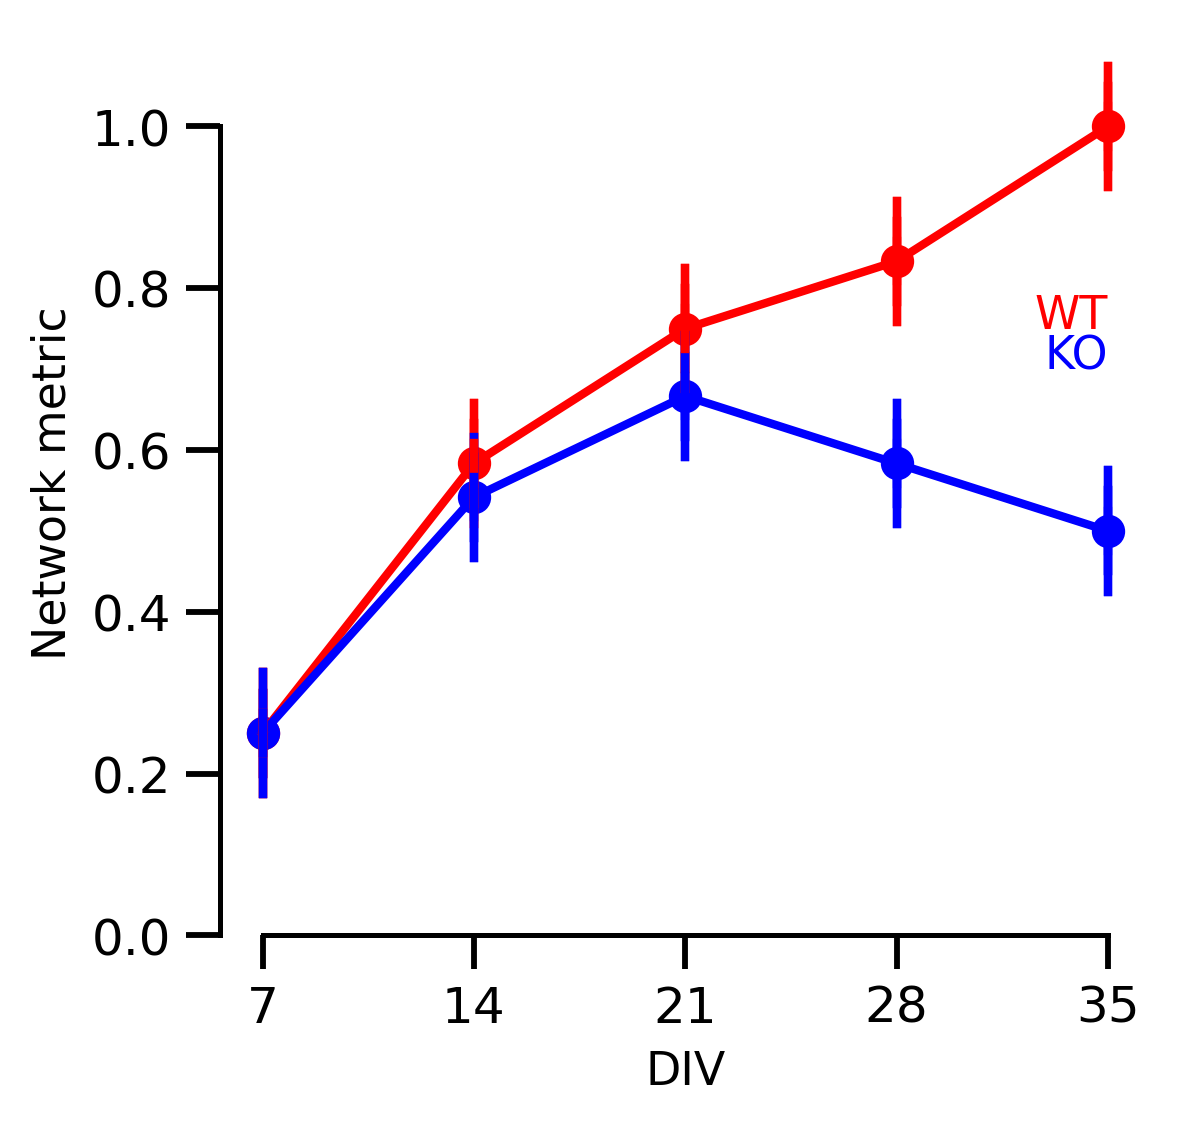

In [57]:
fig_folder = '/Users/timothysit/AnalysisPipeline/python/feature-schematic-figures'
fig_name = 'linePlot.svg'


with plt.style.context(splstyle.get_style('nature-reviews')):

    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    
    x_vals = [7, 14, 21, 28, 35]
    wt_y = np.array([3, 7, 9, 10, 12]) / 12
    ko_y = np.array([3, 6.5, 8, 7, 6]) / 12
    
    wt_error_bar_stds = [0.05, 0.05, 0.075, 0.075, 0.025]
    ko_error_bar_stds = [0.05, 0.05, 0.075, 0.075, 0.025]
    
    ax.scatter(x_vals, wt_y, color='red')
    ax.plot(x_vals, wt_y, color='red')
    
    ax.scatter(x_vals, ko_y, color='blue')
    ax.plot(x_vals, ko_y, color='blue')
    
    for x_index in np.arange(len(x_vals)):
        
        ax.plot([x_vals, x_vals], 
                [wt_y - wt_error_bar_stds[x_index], wt_y + wt_error_bar_stds[x_index]], 
               color='red')
        
        ax.plot([x_vals, x_vals], 
                [ko_y - ko_error_bar_stds[x_index], ko_y + ko_error_bar_stds[x_index]], 
               color='blue')
    
    
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_xticks([7, 14, 21, 28, 35])
    ax.set_xlabel('DIV', size=11)
    ax.set_ylabel('Network metric', size=11)
    
    ax.spines['bottom'].set_bounds([7, 35])
    ax.spines['left'].set_bounds([0, 1])
    ax.text(35, 0.75, 'WT', color='red', size=11, ha='right')
    ax.text(35, 0.7, 'KO', color='blue', size=11, ha='right')
    
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight', transparent=True)
    

# Raster

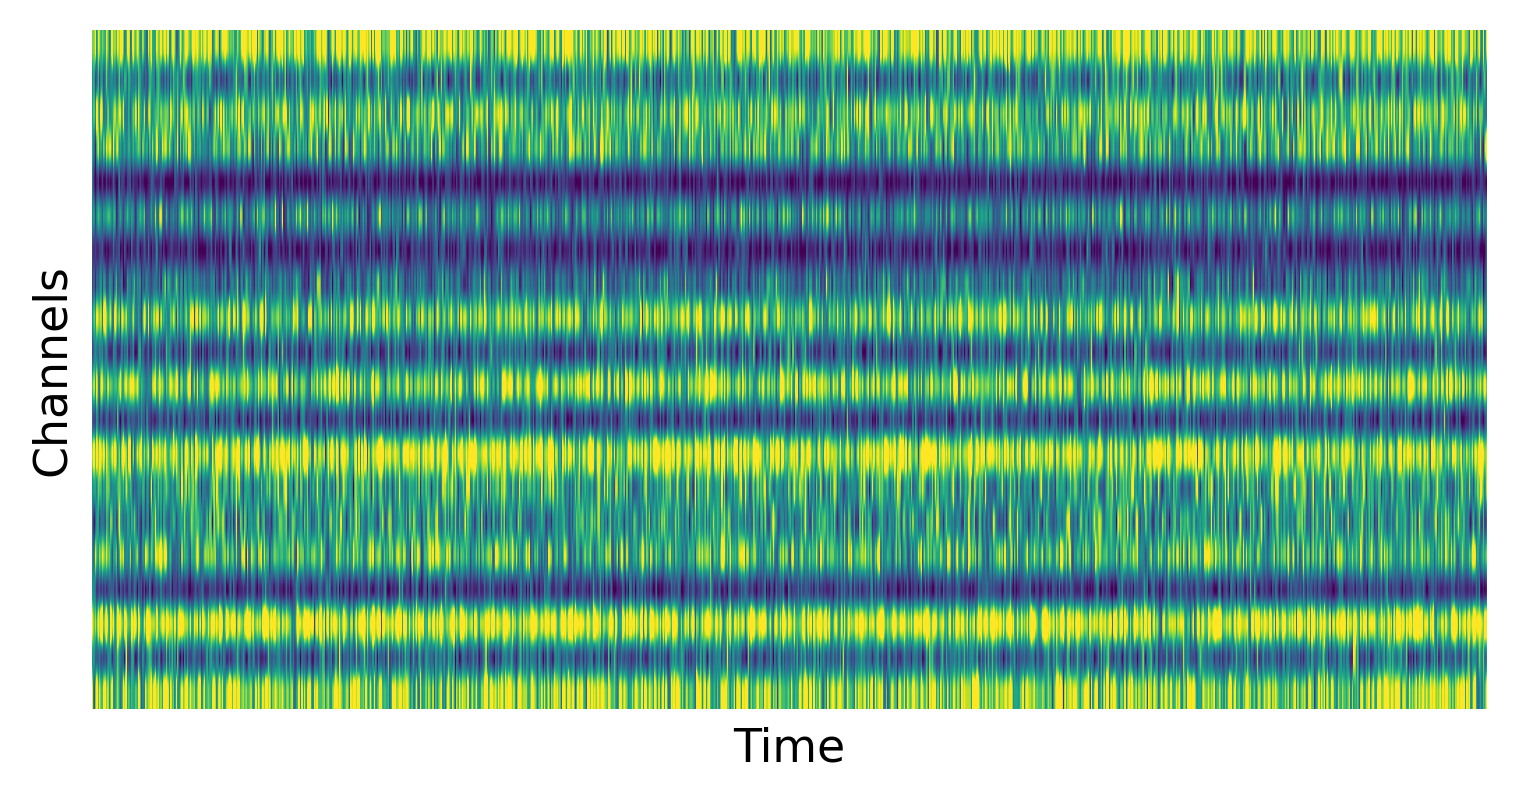

In [99]:
fig_folder = '/Users/timothysit/AnalysisPipeline/python/feature-schematic-figures'
fig_name = 'raster.svg'

with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 3)

    neuron_mean_firing_rates = np.linspace(1, 10, 20)
    neuron_mean_firing_rates = np.random.permutation(neuron_mean_firing_rates)
    
    neuron_frs = [np.random.poisson(x, 1000) for x in neuron_mean_firing_rates]
    raster = np.stack(neuron_frs)

    ax.imshow(neuron_frs, vmin=0, vmax=10, aspect='auto')
    
    ax.set_ylabel('Channels', size=11)
    ax.set_xlabel('Time', size=11)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    fig.savefig(os.path.join(fig_folder, fig_name))

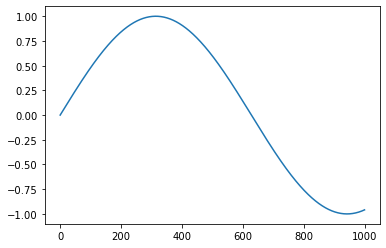

In [83]:
fig, ax = plt.subplots()
ax.plot(np.sin(np.linspace(0, 5, 1000)))